In [16]:
from scipy.io import loadmat
from numpy import array,linalg
from random import shuffle,seed
reg_data = loadmat('regdata.mat')['R']

In [17]:
def prep(data):
    y = array([[x[0] for x in data]]).T
    X = array(data)
    X = array([-x for x in X])
    for x in X:
        x[0] = 1
    return X,y

In [18]:
def train(data,train_size):
    X,y = prep(data)
    return linalg.inv((X.T @ X)) @ X.T @ y

In [19]:
def suc(size,data):
    seed(1) #chosen randomly
    data = array(data) #copy
    shuffle(data)
    train_data = data[:size]
    test_data = data[size:]
    try:
        w = train(train_data,size)
    except linalg.LinAlgError: #some sizes yield matrixes that are singular
        return None
    test_X,test_y = prep(test_data)
    train_X,train_y = prep(train_data)
    pred_x =[data @ w for data in train_X]
    def mse(X,y):
        return sum([(data @ w - output)**2 for data,output in zip(X,y)])
    suc_train = float(mse(train_X,train_y))
    suc_test = float(mse(test_X,test_y))
    return suc_train/100,suc_test/100

In [20]:
data = reg_data
sizes = [10,50,100,200]
results = [(size,suc(size,data)) for size in sizes]
print(results)

[(10, None), (50, (0.5318165671820121, 79.54770416059688)), (100, (2.5996364269912235, 70.59798507399576)), (200, (8.937434874923596, 22.66302686709879))]


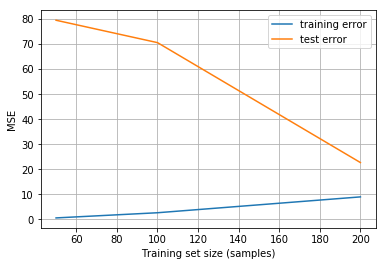

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
tr_err = [result[1][0] for result in results if not result[1]==None]
test_err = [result[1][1] for result in results if not result[1]==None]
ax.plot(sizes[1:], tr_err,label="training error")
ax.plot(sizes[1:],test_err,label="test error")
ax.set(xlabel="Training set size (samples)",ylabel="MSE")
ax.grid()
ax.legend()
plt.show()